In [26]:
from pycaret.datasets import get_data
data = get_data('insurance')
#data.drop("region", axis=1, inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
from pycaret.regression import *
s = setup(data, target = 'charges')

,Description,Value
0,session_id,1135
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [28]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2472.1733,20567123.4594,4455.7879,0.8531,0.3980,0.2671,0.0240
lightgbm,Light Gradient Boosting Machine,2744.1001,22209906.4618,4610.8027,0.8427,0.5010,0.3111,0.0110
rf,Random Forest Regressor,2558.4021,22498340.4970,4657.8210,0.8403,0.4107,0.2656,0.1780
ada,AdaBoost Regressor,3857.0358,25258448.7711,4993.2323,0.8219,0.5697,0.6169,0.0080
et,Extra Trees Regressor,2605.5181,25175279.6187,4922.1366,0.8194,0.4254,0.2630,0.1690
ridge,Ridge Regression,4014.8107,34965924.4000,5889.2985,0.7581,0.6079,0.4010,0.0050
llar,Lasso Least Angle Regression,3992.3057,34960449.4688,5888.8422,0.7581,0.6141,0.3969,0.0060
br,Bayesian Ridge,4009.4624,34968388.2072,5889.5544,0.7581,0.5985,0.4004,0.0050
lasso,Lasso Regression,3999.3793,34964045.0000,5889.3055,0.7580,0.5961,0.3993,0.0060
lr,Linear Regression,3999.4108,34970440.2000,5889.8333,0.7580,0.5966,0.3993,0.0090


In [29]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1135, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [30]:
evaluate_model(best)

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


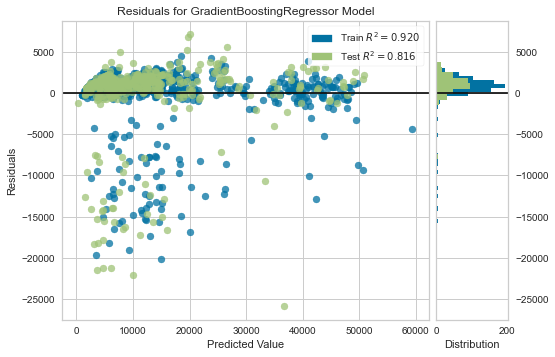

In [31]:
plot_model(best, plot = 'residuals')

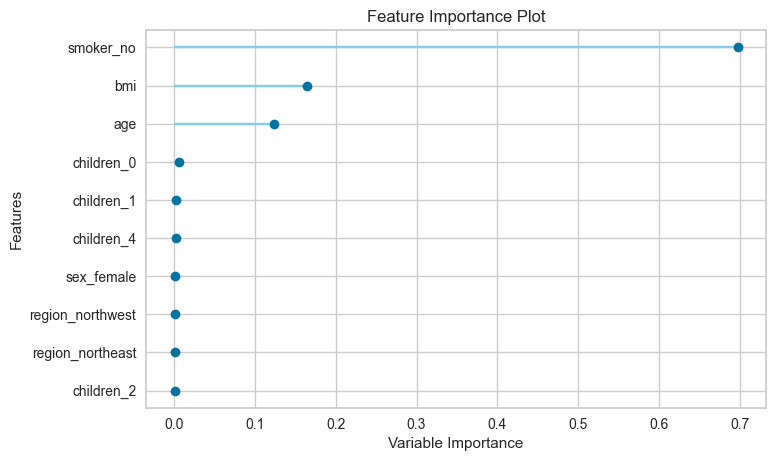

In [32]:
plot_model(best, plot = 'feature')

In [23]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2668.3546,24129655.0593,4912.1945,0.8489,0.4493,0.2981


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,charges,Label
0,30.0,19.950001,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5693.430664,4985.833276
1,33.0,35.750000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4889.999512,7163.782201
2,44.0,27.645000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7421.194336,9273.617825
3,46.0,27.719999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8232.638672,9759.104756
4,64.0,39.049999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16085.127930,16655.715842
...,...,...,...,...,...,...,...,...,...,...,...,...
397,33.0,27.455000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5261.469238,7012.666867
398,24.0,23.655001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2352.968506,3617.366885
399,57.0,43.700001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11576.129883,11948.019959
400,47.0,27.645000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24535.699219,26403.914537


In [24]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2152.2630,16105187.1664,4013.1269,0.8901,0.3760,0.2566


,age,sex,bmi,children,smoker,charges,Label
0,19,female,27.900,0,yes,16884.92400,17859.009391
1,18,male,33.770,1,no,1725.55230,3518.911267
2,28,male,33.000,3,no,4449.46200,5729.882773
3,33,male,22.705,0,no,21984.47061,11287.363957
4,32,male,28.880,0,no,3866.85520,4285.111416


In [25]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           